# Run py12box model
Run the AGAGE 12-box model

In [9]:
import os
import matplotlib.pyplot as plt
import setup
import core
from pathlib import Path
from pandas import read_csv

In [10]:
input_dir = Path(".") / "inputs"

species_info = read_csv(input_dir / "species_info.csv",
                        index_col = "Species")

project_dir = Path(".") / "example"

case = "CFC-11_example"

In [11]:
species = "CFC-11"
mol_mass = 137.3688
time, emissions, ic, lifetime = setup.get_species_parameters(project_dir, case, species)

In [12]:
i_t, i_v1, t, v1, OH, Cl, temperature = setup.get_model_parameters(input_dir,
                                                                   int(len(time) / 12))
F = setup.transport_matrix(i_t, i_v1, t, v1)
c_month, burden, emissions_out, losses, lifetimes = \
    core.model(ic=ic, q=emissions,
               mol_mass=mol_mass,
               lifetime=lifetime,
               F=F,
               temp=temperature,
               Cl=Cl, OH=OH)

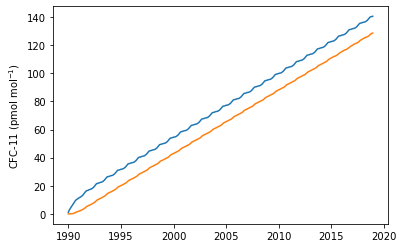

In [13]:
plt.plot(time, c_month[:, 0])
plt.plot(time, c_month[:, 3])
plt.ylabel("%s (pmol mol$^{-1}$)" % species)
plt.show()